In [10]:
%reset

# TF 2.1버전으로 
# GATE연산을 수행하는 Deep Learning으로 구현해보아요!

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print(tf.__version__)

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=1e-1),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_data,
                    t_data,
                    epochs=30000,
                    verbose=0)

predict_val = model.predict(x_data)
result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()

print(classification_report(t_data.ravel(),result))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
2.1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



dict_keys(['loss', 'accuracy'])


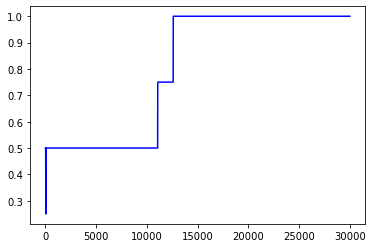

In [11]:
print(history.history.keys())
# dict_keys(['loss', 'accuracy'])의 accuracy는
# epoch당 train data를 이용한 accuracy를 의미

plt.plot(history.history['accuracy'], color='b')
plt.show()